In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [37]:
df = pd.read_csv('cleaned_housing_data.csv')
df.head()

,CURRENT_ENERGY_RATING,PROPERTY_TYPE,BUILT_FORM,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,NUMBER_HABITABLE_ROOMS,NUMBER_OPEN_FIREPLACES,HOTWATER_source,WALLS_CATEGORY,MAINHEAT_DESCRIPTION
0,C,House,Semi-Detached,571.0,134.0,7.0,0.0,Main System,internal insulation,Boiler and radiators
1,C,House,Semi-Detached,740.0,82.0,4.0,0.0,Main System,no insulation,Boiler and radiators
2,D,House,Mid-Terrace,720.0,101.0,6.0,0.0,Main System,no insulation,Boiler and radiators
3,D,Maisonette,Mid-Terrace,664.0,57.0,3.0,0.0,Electric heat pump,Insulated,Electric storage heaters
4,D,Bungalow,Detached,460.0,60.0,3.0,0.0,Main System,Insulated,Boiler and radiators


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150092 entries, 0 to 150091
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CURRENT_ENERGY_RATING   150092 non-null  object 
 1   PROPERTY_TYPE           150092 non-null  object 
 2   BUILT_FORM              150092 non-null  object 
 3   HEATING_COST_CURRENT    150092 non-null  float64
 4   TOTAL_FLOOR_AREA        150092 non-null  float64
 5   NUMBER_HABITABLE_ROOMS  150092 non-null  float64
 6   NUMBER_OPEN_FIREPLACES  150092 non-null  float64
 7   HOTWATER_source         150092 non-null  object 
 8   WALLS_CATEGORY          150092 non-null  object 
 9   MAINHEAT_DESCRIPTION    150092 non-null  object 
dtypes: float64(4), object(6)
memory usage: 11.5+ MB


In [24]:
df.PROPERTY_TYPE.value_counts()

PROPERTY_TYPE
House         99513
Flat          38606
Bungalow       8212
Maisonette     3761
Name: count, dtype: int64

In [25]:
df.BUILT_FORM.value_counts()

BUILT_FORM
Mid-Terrace             50507
Semi-Detached           45739
End-Terrace             31083
Detached                19205
Enclosed Mid-Terrace     1791
Enclosed End-Terrace     1767
Name: count, dtype: int64

In [26]:
df.HOTWATER_source.value_counts()

HOTWATER_source
Main System                                             126034
Electric heat pump                                       19066
Community Scheme                                          3980
No system present                                          554
Gas boiler                                                 397
Secondary system                                            58
Solid fuel boiler/circulator, no cylinder thermostat         3
Name: count, dtype: int64

In [27]:
df.WALLS_CATEGORY.value_counts()

WALLS_CATEGORY
no insulation          106597
Insulated               26094
External insulation      8394
partial insulation       5981
internal insulation      3026
Name: count, dtype: int64

In [29]:
df.MAINHEAT_DESCRIPTION.value_counts()

MAINHEAT_DESCRIPTION
Boiler and radiators             125260
Electric storage heaters           9744
Electric room heaters              7253
Community scheme                   5307
Gas room heater                     713
No system present                   541
Underfloor Boilers                  458
Warm Air(electric/gas)              314
Portable electric heaters           273
Radiators and Electric heater       102
Fuel Room heater                     67
Heat pumps (Air, water)              42
Electric ceiling heating             14
Electric boiler and radiators         3
Micro-cogeneration, mains gas         1
Name: count, dtype: int64

In [30]:
df.describe()

,HEATING_COST_CURRENT,TOTAL_FLOOR_AREA,NUMBER_HABITABLE_ROOMS,NUMBER_OPEN_FIREPLACES
count,150092.000000,150092.000000,150092.000000,150092.000000
mean,658.080937,78.407111,4.079838,0.065193
std,463.361868,43.696449,1.572953,0.383160
min,0.000000,30.000000,1.000000,0.000000
25%,398.000000,60.000000,3.000000,0.000000
50%,563.000000,74.090000,4.000000,0.000000
75%,812.000000,88.000000,5.000000,0.000000
max,41862.000000,9981.000000,62.000000,63.000000


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


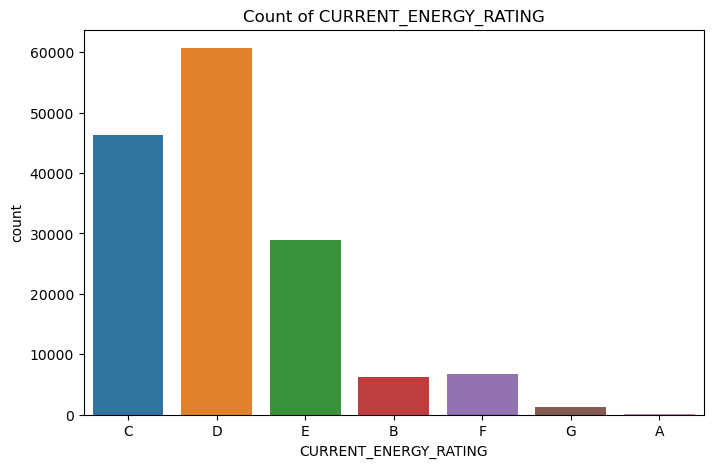

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


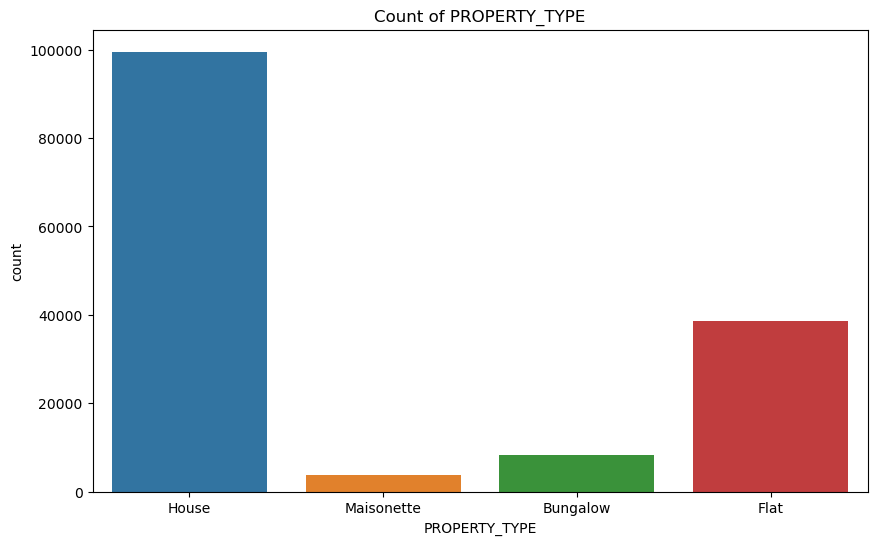

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


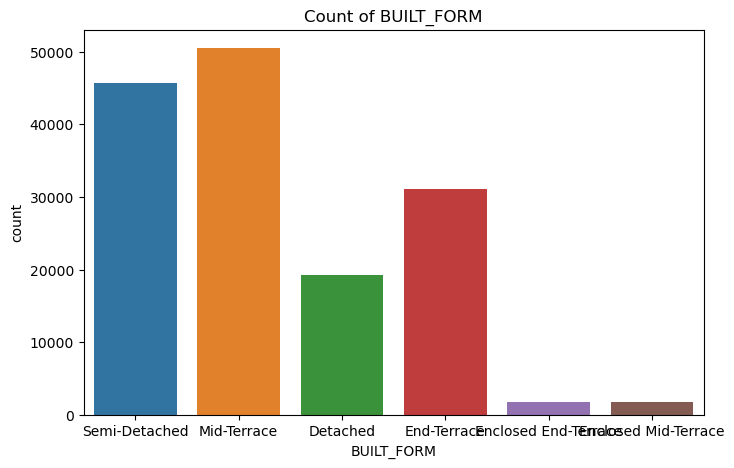

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


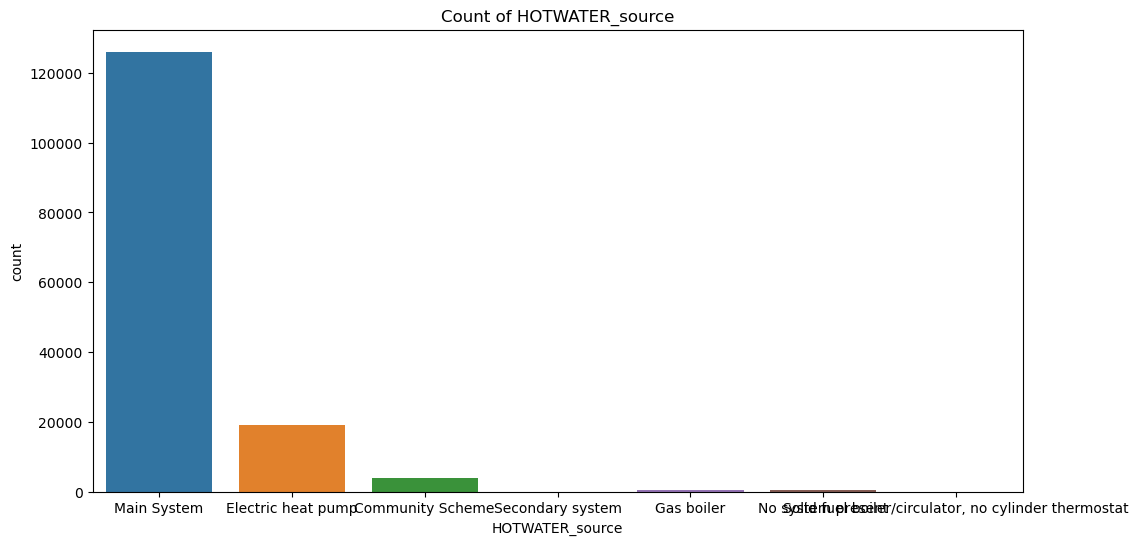

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


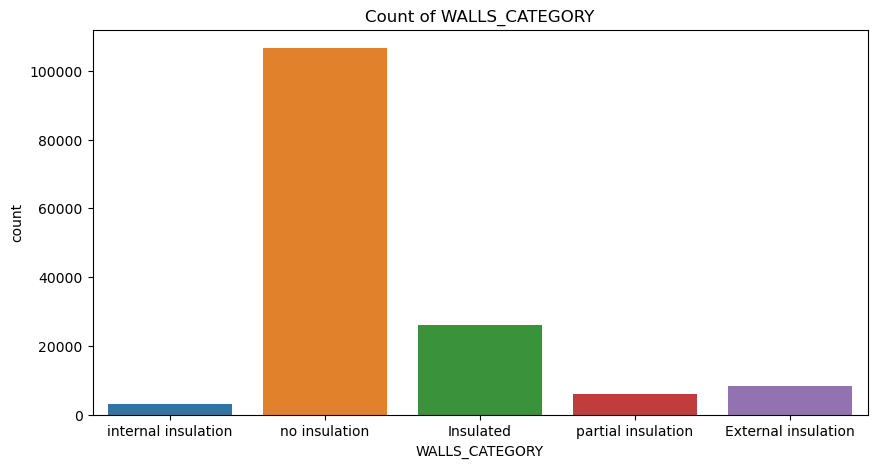

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


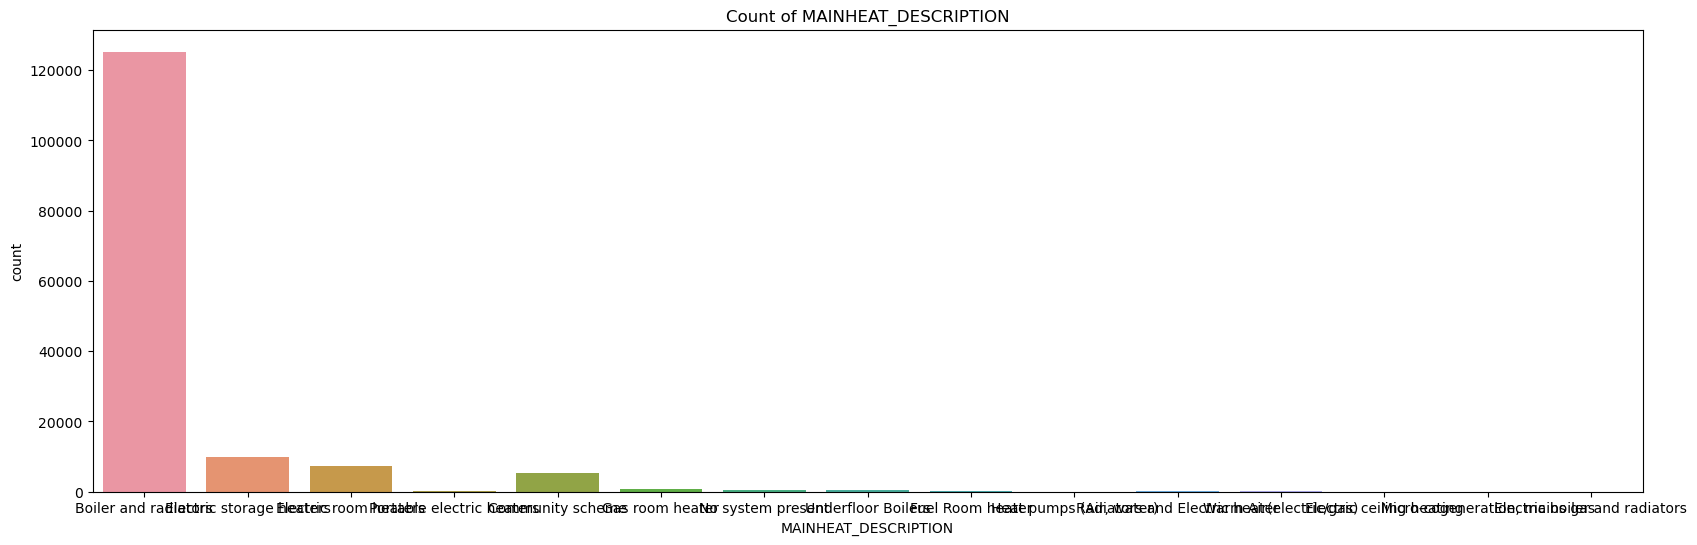

In [31]:
# Bar plots for categorical features
categorical_features = ['CURRENT_ENERGY_RATING', 'PROPERTY_TYPE', 'BUILT_FORM', 'HOTWATER_source', 'WALLS_CATEGORY', 'MAINHEAT_DESCRIPTION']

# Define individual sizes for each plot
#plot_sizes = [(8, 5), (10, 6), (8, 5), (12, 6), (10, 5), (20, 6)]

for i, feature in enumerate(categorical_features):
    # Set the figure size for the current plot
    plt.figure(figsize=plot_sizes[i])

    # Create count plot
    sns.countplot(x=feature, data=df)

    # Set title
    plt.title(f'Count of {feature}')

    # Show the plot
    plt.show()


Text(0.5, 1.0, 'ENERGY RATING DISTRIBUTION')

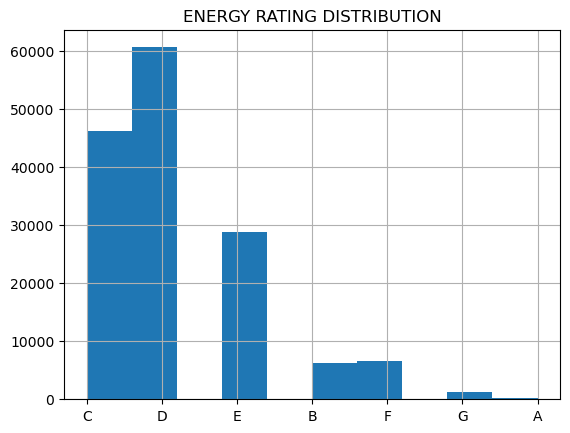

In [10]:
#Histogram of CURRENT_ENERGY_RATING to view distribution of efficiency classes
df['CURRENT_ENERGY_RATING'].hist()
plt.title('ENERGY RATING DISTRIBUTION')

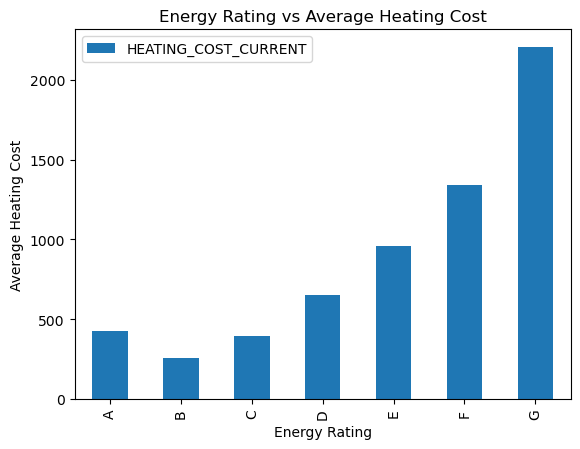

In [11]:
# Group data by energy rating 
grouped = df.groupby('CURRENT_ENERGY_RATING')['HEATING_COST_CURRENT'].mean().reset_index()
# Create bar chart 
ax = grouped.plot(kind='bar', x='CURRENT_ENERGY_RATING', y='HEATING_COST_CURRENT', title='Energy Rating vs Average Heating Cost')
ax.set_xlabel('Energy Rating')
ax.set_ylabel('Average Heating Cost')
plt.show()

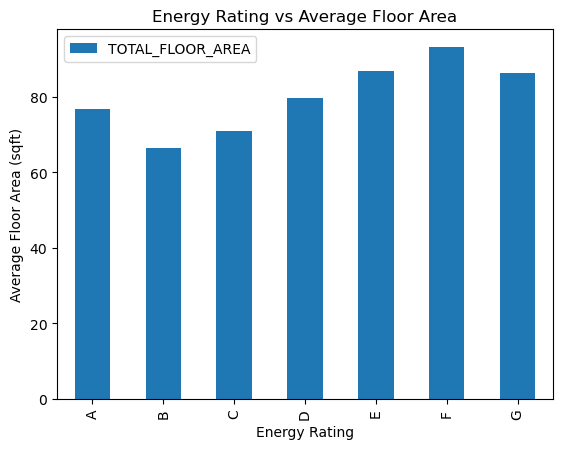

In [12]:
# Group data by energy rating
grouped = df.groupby('CURRENT_ENERGY_RATING')['TOTAL_FLOOR_AREA'].mean().reset_index()

# Create bar chart
ax = grouped.plot(kind='bar', x='CURRENT_ENERGY_RATING', y='TOTAL_FLOOR_AREA', title='Energy Rating vs Average Floor Area')

ax.set_xlabel('Energy Rating') 
ax.set_ylabel('Average Floor Area (sqft)')

plt.show()

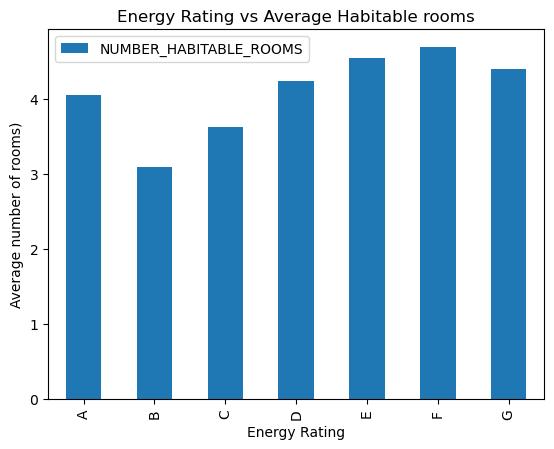

In [13]:
# Group data by energy rating
grouped = df.groupby('CURRENT_ENERGY_RATING')['NUMBER_HABITABLE_ROOMS'].mean().reset_index()

# Create bar chart
ax = grouped.plot(kind='bar', x='CURRENT_ENERGY_RATING', y='NUMBER_HABITABLE_ROOMS', title='Energy Rating vs Average Habitable rooms')

ax.set_xlabel('Energy Rating') 
ax.set_ylabel('Average number of rooms)')

plt.show()

<Axes: xlabel='TOTAL_FLOOR_AREA', ylabel='NUMBER_HABITABLE_ROOMS'>

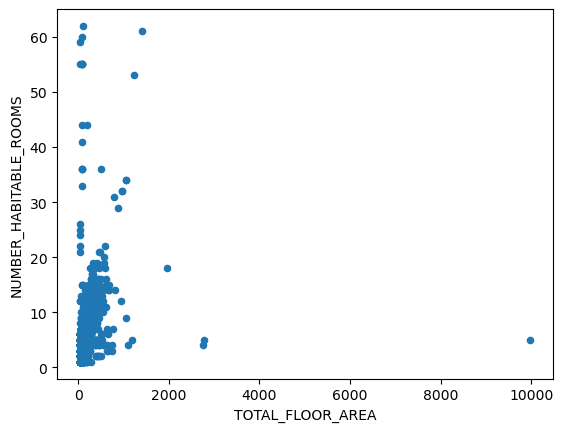

In [14]:
df.plot.scatter(x='TOTAL_FLOOR_AREA', y='NUMBER_HABITABLE_ROOMS')

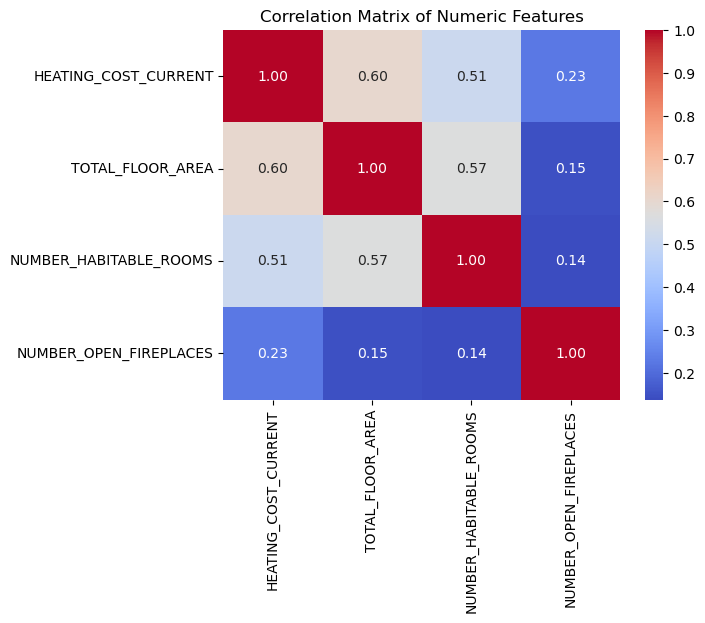

In [15]:
# Correlation matrix for numeric features
numeric_features = ['HEATING_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_OPEN_FIREPLACES']
categorical_features = ['CURRENT_ENERGY_RATING', 'PROPERTY_TYPE', 'BUILT_FORM', 'HOTWATER_source', 'WALLS_CATEGORY', 'MAINHEAT_DESCRIPTION']
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [38]:
# Encode categorical variables
le_property = LabelEncoder()
df['PROPERTY_TYPE'] = le_property.fit_transform(df['PROPERTY_TYPE'])
le_built = LabelEncoder()
df['BUILT_FORM'] = le_built.fit_transform(df['BUILT_FORM'])
le_water = LabelEncoder()
df['HOTWATER_source'] = le_water.fit_transform(df['HOTWATER_source'])
le_walls=LabelEncoder()
df['WALLS_CATEGORY'] = le_walls.fit_transform(df['WALLS_CATEGORY'])
le_heat=LabelEncoder()
df['MAINHEAT_DESCRIPTION'] = le_heat.fit_transform(df['MAINHEAT_DESCRIPTION'])

In [39]:
# Split the dataset into features and target variable
X = df.drop('CURRENT_ENERGY_RATING', axis=1)
y = df['CURRENT_ENERGY_RATING']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize numerical features
scaler = StandardScaler()
X_train[['HEATING_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_OPEN_FIREPLACES']] = scaler.fit_transform(X_train[['HEATING_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_OPEN_FIREPLACES']])
X_test[['HEATING_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_OPEN_FIREPLACES']] = scaler.transform(X_test[['HEATING_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_OPEN_FIREPLACES']])

In [41]:
# Neural Network
nn = MLPClassifier(max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test) 
print(accuracy_score(y_test, y_pred)) 

0.7452613344881575


In [42]:
import pickle

In [43]:
data = {"model": nn, "le_property": le_property, "le_built": le_built, "le_water": le_water, "le_walls": le_walls, "le_heat": le_heat, "scaler": scaler}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)